In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nanonispy as nap
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [19]:
sns.set_style('darkgrid')
#plt.style.use('seaborn-darkgrid')
plt.style.use('default')

In [3]:
init_notebook_mode(connected=True)

In [4]:
import cufflinks as cf

In [5]:
cf.go_offline()

# Import dI/dV map data

In [118]:
grid=nap.read.Grid(".\STM-1 Run #84 NbSe2 film\Grid Spectroscopy020.3ds")
bias_vals=grid.signals.get("sweep_signal")
bias = bias_vals *1000
lockin=grid.signals.get("Lockin X (V)")

In [120]:
ZBC = lockin[:,:,20]
#ZBC_true = ZBC.reshape((30,55))

# Interactive visualization of ZBC 

In [121]:
df = pd.DataFrame(data=ZBC)

In [142]:
df.iplot(kind='heatmap',colorscale='-ylgnbu',layout={"height": 500,"width": 500,"autosize": False},zmin=0.4, zmax=1.5)

In [29]:
cf.colors.scales()

# ZBC_raw data

In [146]:
plt.figure()
plt.imshow(ZBC,cmap='YlGnBu_r',aspect=1,origin='lower',vmin=0.4, vmax=1.5);
plt.colorbar(shrink=1)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Grid 20_ZBC.png", dpi=300)
plt.close()

# ZBC_average

In [184]:
width = 1
ZBC_avg = lockin_reshaped[:,:,(20-width):(20+1+width)].mean(axis=2)
#ZBC_avg = lockin[:,:,(25-width):(25+1+width)].mean(axis=2)
#ZBC_avg_true = ZBC_avg.reshape((30,55))

In [186]:
plt.figure()
plt.imshow(ZBC_avg_true,cmap='YlGnBu_r',aspect=3/4,origin='lower',vmin=0.3, vmax=1.6);
plt.colorbar(shrink=0.5)
plt.tight_layout()

plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Grid 14_ZBC_avg.png", dpi=300)
plt.close()

# Linecut through and away from vortex with offset

In [158]:
#lockin_reshaped = lockin.reshape(30,55,51)
linecut1 = lockin[9,:,:]
plt.figure(figsize=(4,10))
for i in range(25):
    plt.plot(bias,linecut1[i,:]+0.18*i)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,6.5))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Linecut through vortex',size=20,pad =12)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Linecut thru vortex in Grid 20.png", dpi=300)
plt.close()

In [157]:
linecut2 = lockin[:,1,:]
plt.figure(figsize=(4,10))
for i in range(25):
    plt.plot(bias,linecut2[i,:]+0.18*i)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,6.5))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Linecut away from vortex',size=20,pad =12)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Linecut away from vortex in Grid 20.png", dpi=300)
plt.close()

# Linecut through and away from vortex overlap

In [162]:
plt.figure(figsize=(8,6))
for i in range(25):
    plt.plot(bias,linecut1[i,:])
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,2.2))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Linecut through vortex overlapped',size=20,pad =12)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Linecut thru vortex in Grid 20_overlapped.png", dpi=300)
plt.close()

In [164]:
plt.figure(figsize=(8,6))
for i in range(25):
    plt.plot(bias,linecut2[i,:])
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,2.2))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Linecut away from vortex overlapped',size=20,pad =12)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Linecut away from vortex in Grid 20_overlapped.png", dpi=300)
plt.close()

## Subtract a line and normalize to the left side

In [167]:
plt.figure(figsize=(8,6))
rbound = 7
lbound = 41- rbound
for i in range(25):
    right = linecut1[i,:rbound].mean()
    left = linecut1[i,lbound:].mean()
    slope = (right - left)/3.0
    Sub_spec =  linecut1[i,:]-bias*slope
    Norm_spec = Sub_spec/Sub_spec[-1]
    plt.plot(bias, Norm_spec)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,1.5))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Linecut through vortex overlapped_normalized',size=20,pad =12)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Linecut thru vortex in Grid 20_overlapped_norm.png", dpi=300)
plt.close()

In [168]:
plt.figure(figsize=(8,6))
for i in range(25):
    right = linecut2[i,:rbound].mean()
    left = linecut2[i,lbound:].mean()
    slope = (right - left)/3.0
    Sub_spec =  linecut2[i,:]-bias*slope
    Norm_spec = Sub_spec/Sub_spec[-1]
    plt.plot(bias, Norm_spec)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,1.5))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Linecut away from vortex overlapped_normalized',size=20,pad =12)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Linecut away from vortex in Grid 20_overlapped_norm.png", dpi=300)
plt.close()

# Average spectra inside and outside vortex

In [172]:
in_avg = np.mean(lockin[5:14,7:16,:],axis=(0,1))
out_avg = np.mean(lockin[18:,:7,:],axis=(0,1))
plt.figure(figsize=(8,6))
plt.plot(bias, in_avg,'orange',label='Inside vortex')
plt.plot(bias, out_avg,'green',label='Outside vortex')
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,2.2))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 15)
plt.title('Avg spectra inside and outside vortex',size=20,pad =12)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Avg spectra inside and outside vortex in Grid 20.png", dpi=300)
plt.close()

# Linecut from 3ds file

In [98]:
#linecut_list = []
#for i in range(17,20):
    #linecut_temp = nap.read.Grid('.\STM-1 Run #84 NbSe2 film\Grid Spectroscopy0'+str(i)+'.3ds')
    #linecut_list.append(linecut_temp)
linecut_temp = nap.read.Grid('.\STM-1 Run #84 NbSe2 film\Grid Spectroscopy013.3ds')

In [99]:
#lc_bias_vals=linecut_list[0].signals.get("sweep_signal")
lc_bias_vals=linecut_temp.signals.get("sweep_signal")
lc_bias = lc_bias_vals *1000

In [134]:
linecut=[]
for i in range(3):
    linecut.append(linecut_list[i].signals.get("Lockin X (V)"))

In [102]:
plt.figure(figsize=(4,10))
#for i in range(len(linecut[2])):
    #a = linecut[2]
    #plt.plot(lc_bias, a[i,0]+0.11*i,'#8645A3')
linecut=linecut_temp.signals.get("Lockin X (V)")
for i in range(31):
    plt.plot(lc_bias,linecut[i,0]+0.2*i)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.title('Linecut',size=20,pad =12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim((0,8))
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Linecut 13.png", dpi=300)
plt.close()

# Uncompleted map

In [62]:
path="C:\\Users\\yichen\\Desktop\\NbSe2\\STM-1 Run #84 NbSe2 film\\Grid 14\\Grid Spectroscopy014-PointSpec00001.dat"
data = np.loadtxt(path,skiprows=20)

In [68]:
bias = data[:,0]*1000

In [69]:
bias

array([ 2. ,  1.9,  1.8,  1.7,  1.6,  1.5,  1.4,  1.3,  1.2,  1.1,  1. ,
        0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,  0. , -0.1,
       -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1. , -1.1, -1.2,
       -1.3, -1.4, -1.5, -1.6, -1.7, -1.8, -1.9, -2. ])

In [70]:
path_prefix = "C:\\Users\\yichen\\Desktop\\NbSe2\\STM-1 Run #84 NbSe2 film\\Grid 14\\Grid Spectroscopy014-PointSpec00"
map_partial = []
for i in range(1,451):
    if i < 10:
        path = path_prefix + "00"+ str(i) +".dat"
    elif i < 100:
        path = path_prefix + "0"+ str(i) +".dat"
    else:
        path = path_prefix + str(i) + ".dat"
    data = np.loadtxt(path,skiprows=20)
    map_partial.append(data[:,2])

In [71]:
map_partial_2d = np.array(map_partial)

In [93]:
lockin_reshaped = map_partial_2d.reshape(15,30,41)

In [92]:
ZBC_true = lockin_reshaped[:,:,20]

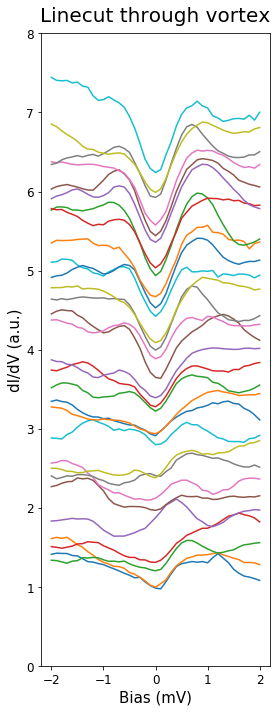

In [90]:
linecut1 = lockin_reshaped[3,:,:]
plt.figure(figsize=(4,10))
for i in range(30):
    plt.plot(bias,linecut1[i,:]+0.2*i)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,8))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Linecut through vortex',size=20,pad =12)
plt.tight_layout()
#plt.savefig(".\STM-1 Run #84 NbSe2 film\Maps with vortices\Linecut thru vortex in Grid 14.png", dpi=300)
#plt.close()